# MSP Simulation Example
# System decoupling based on Latency Insertion Method (LIM)

## Sample Circuit

<img src="Fig1_LIM.png" width="400" align="left">

$R$=$1 \Omega$    
$R_1 = R_2 = R_3 = R$  
$L$=$0.5 mH$  
$C$=$0.5 mF$     
$C_1 = C_2 = C_3 = C$  
$I_3$=$1 A$

## Circuit and Simulation Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(sign=' ')

# Circuit parameters:
R = 1.0
L = 0.5e-3
C = 0.5e-3
I3 = 1.0

## Latency Insertion Method

In [2]:
# Incidence matrix
M = np.array([ [1,  1,  0],
                 [-1,  0,  1],
                 [0,  -1,  -1]])

# Number of branches Nb and number of nodes Nn:
(Nn, Nb) = np.shape(M)

# Branches
R_b = np.array([ [R,  0.5*R,  R]])
L_b = np.array([ [0.5*L,  L,  0.5*L]])

# Nodes
R_n = np.array([ [R, R,  R]])
C_n = np.array([ [C,  C, C]])

### Simulation parameters 

In [3]:
# Total simulation time
T_total = 0.008
# Simulaiton time step 
Ts = 0.1e-3
# Number of simulation time steps
npoint = int(np.round(T_total/Ts))

print('Total simulation time: ' + str(T_total))
print('\nSimulation time step: ' + str(Ts))

# Stability condition
print('\nStability condition:\n Ts < sqrt(Lk*Ck)')
# Calculate maximum allowed time step based on circuit parameters 
Ts_max = np.sqrt(np.amin([ [L_b[0,0]*C_n[0,0]], [L_b[0,0]*C_n[0,1]], [L_b[0,1]*C_n[0,0]], [L_b[0,1]*C_n[0,2]], [L_b[0,2]*C_n[0,1]], [L_b[0,2]*C_n[0,2]]]))    
print(str(Ts) + ' < ' + str(Ts_max))

Total simulation time: 0.008

Simulation time step: 0.0001

Stability condition:
 Ts < sqrt(Lk*Ck)
0.0001 < 0.00035355339059327376


### Simulation loop 

In [4]:
# Current source vectors for all nodes
H = np.zeros((npoint, Nn))
H[:,2] = I3*np.ones((npoint))
# Voltage source vectors for all branches
E = np.zeros((npoint, Nb))

# Create matrix to store solution of branch currents in every simulation steps
I = np.zeros((npoint, Nb))
# Create matrix to store solution of node voltages in every simulation steps
V = np.zeros((npoint, Nn))

# Initial conditions
# Branch inductances: current = 0
I[0,:] = np.zeros((1, Nb))

# Node capacitance: voltage = 0
# Calculate V(Ts/2) based on a given initial conditions V(0)
V_0 = np.zeros((1, Nn))
for j in np.arange(0, Nn): 
    V[0,j] = (C_n[0,j]*V_0[0,j]/Ts - np.matmul(M[j,:], np.transpose(I[0,:])) + H[0,j]) / (C_n[0,j]/Ts + 1/R_n[0,j])
    
# Time loop 
for i in np.arange(1,npoint):
    # Branch loop - calculation of I(i*Ts) based on I((i-1)*Ts) and V((i-1/2)*Ts)
    for j in np.arange(0, Nb):
        I[i,j] = I[i-1,j] + Ts/L_b[0,j] * (np.matmul(np.transpose(M[:,j]), np.transpose(V[i-1,:])) - R_b[0,j] * I[i-1,j] + E[i-1,j])
        
    # Node loop - calculation of V((i+1/2)*Ts) based on I(i*Ts) and V((i-1/2)*Ts)
    for j in np.arange(0, Nn):
        V[i,j] = (C_n[0,j]*V[i-1,j]/Ts - np.matmul(M[j,:], np.transpose(I[i,:])) + H[i,j]) / (C_n[0,j]/Ts + 1/R_n[0,j])

### Plots

In [5]:
# Time vectors
# for branch currents
t_I = np.arange(0, npoint)*Ts
# for node voltages
t_V = (np.arange(0, npoint) + 0.5)*Ts

In [6]:
# Plots
plt.figure(figsize=(8,6))
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.title('Branch currents')
plt.plot(t_I,I[:,0], t_I, I[:,1], t_I,I[:,2], linewidth=2)
plt.xlim([0, (npoint-1)*Ts])
plt.legend(['Current $i_{a}$(t)', 'Current $i_{b}$(t)', 'Current $i_{c}$(t)'], prop={'size': 14})
plt.show()

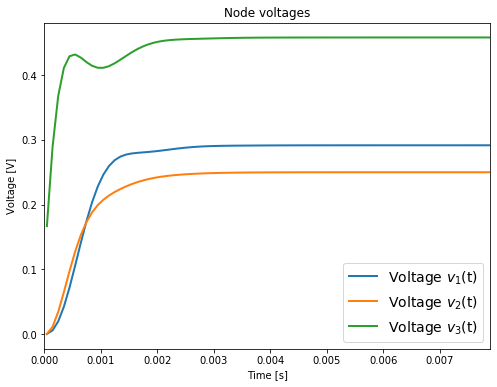

In [7]:
# Plots
plt.figure(figsize=(8,6))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Node voltages')
plt.plot(t_V,V[:,0], t_V, V[:,1], t_V,V[:,2], linewidth=2)
plt.xlim([0, (npoint-1)*Ts])
plt.legend(['Voltage $v_{1}$(t)', 'Voltage $v_{2}$(t)', 'Voltage $v_{3}$(t)'], prop={'size': 14})
plt.show()